## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import pickle

sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils, file_utils, rna_seq_utils, microarray_utils

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/michaelbertagna/anaconda3/env

In [2]:
dataset = 'rna_seq'
phases = 'rna_seq'

full_filtered_df = pd.read_csv('../../active_fastas/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_norm_df.shape[0]
num_genes

21524

In [3]:
dataset = 'microarray'
phases = 'full'

full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

num_genes = full_filtered_norm_df.shape[0]
num_genes

19152

In [4]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
4461,TTHERM_00227850,5.092755,4.725777,4.857775,4.455750,4.619170,4.858171,4.845744,4.638033,4.773728,...,9.600296,7.712706,7.742299,8.048764,7.123835,6.835522,7.690815,7.092362,6.244613,7.815722
12160,TTHERM_00864860,7.070552,7.257069,7.201284,7.319625,7.081797,7.685931,6.475135,7.415653,7.748728,...,8.134320,8.901326,8.751006,7.926430,8.273039,8.461259,8.550579,8.417071,8.512400,8.184103
236,TTHERM_000112349,7.068744,6.960372,6.508883,7.332550,6.988299,6.713100,8.134471,6.972405,6.915490,...,8.230558,8.364525,8.707852,8.332700,8.807380,8.927913,8.653127,9.662081,9.576801,8.798266
2790,TTHERM_00120940,7.992579,7.670175,8.194798,7.944095,7.525853,7.978173,8.008029,7.752615,8.262270,...,7.228445,7.756997,7.602863,7.262156,7.617628,7.360460,7.468055,7.846889,7.698046,7.645713
7233,TTHERM_00441960,7.394011,7.413789,7.379820,8.204794,7.828761,7.088173,8.773758,7.470228,6.786998,...,8.962042,8.732434,8.958502,8.443767,9.208352,9.214267,9.588229,9.574130,9.732238,9.293974
1261,TTHERM_00047460,11.691981,12.445641,12.120597,11.023799,11.418377,11.721491,10.108773,10.938049,10.614152,...,10.901668,10.829238,11.043358,11.108799,10.374240,10.511681,10.751826,10.552315,10.200771,10.174020
7875,TTHERM_00473220,9.352158,8.504362,9.119954,9.546998,8.589708,9.352860,9.558667,8.333226,8.627167,...,9.916040,8.999384,9.495228,8.947006,9.366298,9.207121,9.155194,9.564986,9.743113,9.060695
6273,TTHERM_00355730,6.479052,5.825452,5.728224,6.526914,5.656034,5.845255,6.915988,5.787600,6.233563,...,6.517334,6.600809,6.745608,6.684075,6.979049,7.192602,6.203079,6.954190,7.205026,6.381440
9126,TTHERM_00563890,9.818117,10.050313,9.530031,9.438339,9.618968,9.400018,9.063281,9.424073,9.057753,...,9.280968,9.294647,8.999493,9.242117,8.964963,8.982607,8.608646,8.844014,9.144345,8.843329
14901,YF00005963.t1,6.459088,6.289222,6.412599,6.710811,6.486478,6.424063,7.006737,6.809179,7.183467,...,6.948138,6.876629,7.417939,6.920945,7.302154,7.257345,6.496731,7.849151,7.564102,7.011233


### LEIDEN CLUSTERING

In [5]:
metric = 'manhattan'
# metric='minkowski_3.0'

# resolution_param=0.050
resolution_param=0.005

n_neighbors = 3

In [6]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    dataset,
    metric=metric, 
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [7]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

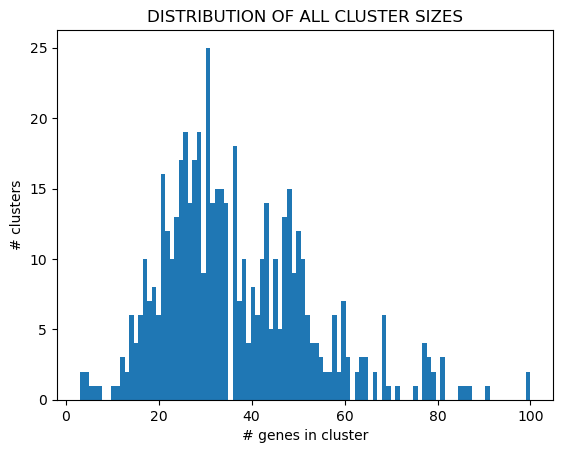

In [8]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

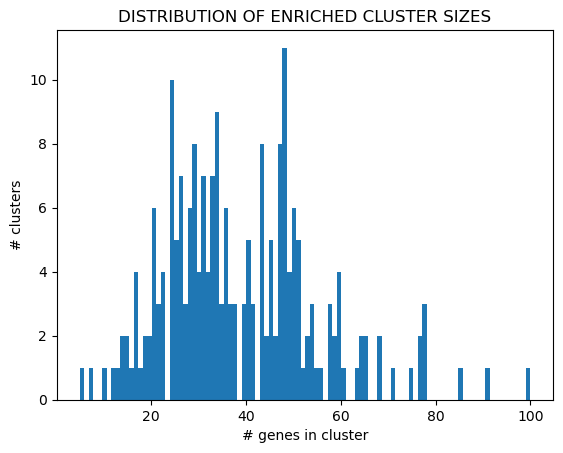

In [9]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [10]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.03207237797185188
                  modularity: 0.731594496331647
                   nclusters: 522
           mean_cluster_size: 36.689655172413794
         median_cluster_size: 33.5
             sd_cluster_size: 16.01147362426574
          nenriched_clusters: 214
  mean_enriched_cluster_size: 38.742990654205606
median_enriched_cluster_size: 36.0
    sd_enriched_cluster_size: 16.154751693261666
     nenriched_cluster_genes: 8291
                    datetime: 2024-05-08 14:48:02.412990


In [11]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [12]:
outfile='../enrichment/test_nn3_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [13]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [14]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [15]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [16]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [17]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [19]:
embedding_metric = 'manhattan'

merge = bokeh_ui_utils.generate_server_data(full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, phases, color_palette, n_neighbors=n_neighbors, random_state=42, embedding_metric=embedding_metric)

/Users/michaelbertagna/anaconda3/envs/cdh2_bokeh.env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [20]:
merge.head()

,TTHERM_ID,label,Ll,Lm,Lh,S0,S3,S6,S9,S15,...,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,expr_xs,expr_ys,module,radius
0,YF00029309.t1,521,-0.335873,0.620937,0.809301,-0.874434,0.678284,-0.602256,0.333719,-0.707379,...,"ko00000,ko03036",-,-,-,"ANAPC4_WD40,HMG_box,Mcl1_mid,WD40",-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.33587335004694446, 0.6209372185630918, 0.8...",m0521,0.091563
1,YF00027998.t1,521,-0.872293,-0.362722,-0.429385,0.987447,0.122962,-0.538277,0.116789,-0.440781,...,"ko00000,ko02000",1.A.1.4,-,-,Ion_trans,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.8722931900478491, -0.36272159183759084, -0...",m0521,0.091563
2,YF00025763.t1,521,-0.170929,-0.245540,-0.427848,-0.043915,-0.170772,-0.625352,0.542448,0.096892,...,-,-,-,-,-,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-0.17092910449519327, -0.24553963059190972, -...",m0521,0.091563
3,YF00024484.t1,521,1.498975,1.693382,2.109596,-1.568686,0.008425,-0.254286,-0.157371,-0.866143,...,"ko00000,ko00001,ko01000",-,-,-,His_Phos_2,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[1.4989748701086487, 1.6933821889204488, 2.109...",m0521,0.091563
4,YF00021039.t1,521,-1.131941,-0.970356,-0.601648,1.879833,-0.505306,0.213671,0.081592,-0.713339,...,-,-,-,-,-,-,"[Ll, Lm, Lh, S0, S3, S6, S9, S15, S24, C0, C4,...","[-1.1319413482010614, -0.9703561098137494, -0....",m0521,0.091563


In [21]:
merge.columns

Index(['TTHERM_ID', 'label', 'Ll', 'Lm', 'Lh', 'S0', 'S3', 'S6', 'S9', 'S15',
       'S24', 'C0', 'C4', 'C6', 'C8', 'C10', 'C12', 'C14', 'C16', 'C18', 'x',
       'y', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs', 'max_annot_lvl',
       'COG_category', 'Description', 'Preferred_name', 'GOs', 'EC', 'KEGG_ko',
       'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction', 'KEGG_rclass', 'BRITE',
       'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs', 'TGD2021_description',
       'expr_xs', 'expr_ys', 'module', 'radius'],
      dtype='object')

In [22]:
with open('./server_data.pkl', 'wb') as f:
    pickle.dump(merge, f)